In [2]:
import pandas as pd

In [4]:
# Datensatz der Ratings über Pandas laden
dataset = pd.read_csv("ratings_small.csv")

# Lineare Regressionsanalyse
#### Imports

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets, linear_model, model_selection
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

#### Datenaufbereitung

In [16]:
# Deklaration der zu befüllenden Arrays
ratings_X = np.empty(shape=[0, 1])
ratings_Y = np.empty(shape=[0, 1])

# Datenaufbereitung
for index, row in dataset.iterrows():
    ratings_X = np.append(ratings_X, [[row['timestamp']]], 0)
    ratings_Y = np.append(ratings_Y, [[row['rating']]], 0)
    
    
    


In [18]:
# Letzte 150 Einträge zum Testen in separates Array
ratings_X_test = ratings_X[-150:]
ratings_Y_test = ratings_Y[-150:]

# Restliche Einträge zum Berechnen der Regressionsgerade in separates Array
ratings_X_train = ratings_X[:-150]
ratings_Y_train = ratings_Y[:-150]

#### Regression

In [21]:
# Objekt für Lineare Regression erstellen
regr = linear_model.LinearRegression()

# Regressionsgerade berechnen
regr.fit(ratings_X_train, ratings_Y_train)

# Vorhersagen für die Test- und Trainingsdatensätze treffen
ratings_Y_vorsage = regr.predict(ratings_X_test)
ratings_Y_vorsage_train = regr.predict(ratings_X_train)
print('y = a*x + b')
print('a =', regr.coef_[0][0] , '   b =', regr.intercept_[0])

y = a*x + b
a = -2.1425850992373614e-10    b = 3.785192396365245


# Plotten

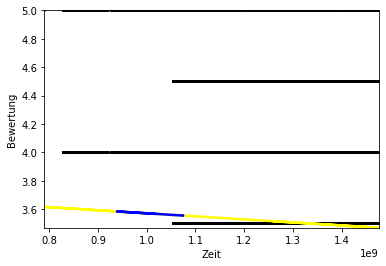

In [22]:
%matplotlib inline

# Plotten der Datenpunkte
plt.scatter(ratings_X, ratings_Y, 2.5, color='black', alpha=1)

# Plotten der Regressionsgerade der Trainingsdaten in gelb
plt.plot(ratings_X_train, ratings_Y_vorsage_train, color='yellow', linewidth=2.5)

# Plotten der Vorhersage in blau
plt.plot(ratings_X_test, ratings_Y_vorsage, color='blue', linewidth=2.5)

# Wertebereich anpassen
plt.xlim(min(ratings_X),max(ratings_X))
plt.ylim(min(ratings_Y_vorsage_train),max(ratings_Y))

# Achsenbeschriftung
plt.ylabel("Bewertung")
plt.xlabel("Zeit")

# Ausgabe des Plots
plt.show()

#### Bestimmtheitsmaß

In [24]:
print("R^2: %.3f" % (r2_score(ratings_Y_train, ratings_Y_vorsage_train)))

R^2: 0.002


# Fazit
## Datensatz ist nicht dafür zu gebrauchen, nicht für diesen Anwendungsfall!!!!!!!!!!!!!
